In [292]:
#LES IMPORTATIONS
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

Importation du fichier csv

In [293]:
dataframe = pd.read_csv("scorm_tracking_copy.csv" , delimiter=";" )

Afficher les elements du Dataframe

In [294]:
dataframe.head()

,id,Etudiants,Session_Nombre,Modules,activity_type,progression,score,temps,total_ecrans,created,modified,learning_object,processed
0,1,ga2018_umbe@yopmail.com,session-20,694-vorstellung,lesson,1.0,100.0,589.0,8,25/08/2016 17:22,25/08/2016 17:32,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
1,2,dtic@mobiletic.com,session-33,683-programme-nescens,lesson,1.0,0.0,6194.0,2,25/08/2016 17:27,02/11/2017 15:40,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
2,3,dtic@mobiletic.com,session-37,678-politique-et-cadre-legal,lesson,1.0,71.0,31203.0,11,25/08/2016 17:27,27/10/2017 08:21,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
3,4,dtic@mobiletic.com,session-46,671-presentation,lesson,1.0,22.0,112788.0,7,25/08/2016 17:29,30/11/2017 16:53,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",1
4,5,dtic@mobiletic.com,session-52,684-informatique,lesson,1.0,0.0,841.0,4,25/08/2016 17:30,02/11/2017 15:56,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0


In [295]:
#Taille du dataframe
dataframe.shape

(27403, 13)

In [296]:
#Aficher les Modules, les apprenants, les sessions et le score
df = dataframe[['Modules','Etudiants','Session_Nombre','score']]
df.head()

,Modules,Etudiants,Session_Nombre,score
0,694-vorstellung,ga2018_umbe@yopmail.com,session-20,100.0
1,683-programme-nescens,dtic@mobiletic.com,session-33,0.0
2,678-politique-et-cadre-legal,dtic@mobiletic.com,session-37,71.0
3,671-presentation,dtic@mobiletic.com,session-46,22.0
4,684-informatique,dtic@mobiletic.com,session-52,0.0


In [297]:
#Calculer l'effctif par module
n_etudiant = df.groupby(['Modules']).Etudiants.nunique()

#Nombre total de session par module
n_session = df.groupby(['Modules']).Session_Nombre.nunique()

#Score maximum et minimum
score_min = df.groupby(['Modules']).score.min()
score_max = df.groupby(['Modules']).score.max()

In [298]:
#Nouveau Dataframe du nombre d'etudiants en fonction du module
df1 = pd.DataFrame(n_etudiant)
#df1

In [299]:
#Ajouter au dataframe crée le nombre de session, score min, score max
df1['nombre_session']=n_session
df1['score_min']=score_min
df1['score_max']=score_max
df1.head()

,Etudiants,nombre_session,score_min,score_max
Modules,,,,
632-le-hibou-grand-duc,1,1,0.0,0.0
669-vallee-trient-finhaut-source-de-bien-etre,1,1,0.0,0.0
671-presentation,340,634,0.0,100.0
674-strategie-et-croissance,327,471,0.0,100.0
677-affaires-medicales,322,469,0.0,100.0


In [300]:
#Les scores superireus a 50
score_50 = df[df['score'] >= 50]
#score_50

#Nombre d'admis par module
N_admis = score_50.groupby(['Modules','Etudiants']).score.max()
#N_admis

#Compter le nombre d'admis en fonction des differents modules
Nombre_Admis = N_admis.groupby(['Modules']).count()
#Nombre_Admis


In [301]:
#Afficher la colonne du nombre d'admis 
df1['Nombre_admis'] = Nombre_Admis
#df1


In [302]:
#Gerer les non definis en les changeant en 0
df1['Nombre_admis'] = df1['Nombre_admis'].fillna(0)
#df1

In [303]:
#Calcul du taux de reussite
Taux_reussite = (df1['Nombre_admis']/df1['Etudiants'])*100

#Convertir le taux en pourcentage
df1['Taux_reussite'] = Taux_reussite
#df1.head()

#Classement en ordrede taux de reussite plus grand au plus petit 
df2 = df1.sort_values(by=['Taux_reussite'],ascending=False)
#df2.head(40)


#Affichage du top 10 
top10_df = df2.head(10)
top10_df

,Etudiants,nombre_session,score_min,score_max,Nombre_admis,Taux_reussite
Modules,,,,,,
752-etudes-de-cas-et-questions,123,216,0.0,100.0,122.0,99.186992
734-risques-psychosociaux,124,153,0.0,100.0,122.0,98.387097
819-informatique,59,68,0.0,100.0,58.0,98.305085
755-verhalten-des-mitarbeitenden,94,233,0.0,100.0,92.0,97.872340
761-fallstudien-und-fragen,89,242,0.0,100.0,87.0,97.752809
765-urlaub,88,308,0.0,100.0,86.0,97.727273
766-unbezahlter-urlaub,88,188,0.0,100.0,86.0,97.727273
729-salaire,129,255,0.0,100.0,126.0,97.674419
747-modification-des-rapports-de-travail,124,242,0.0,100.0,121.0,97.580645


In [304]:
#Convertir le dataframe top10 en numpay array
tableau = top10_df.to_numpy()
tableau

array([[123.        , 216.        ,   0.        , 100.        ,
        122.        ,  99.18699187],
       [124.        , 153.        ,   0.        , 100.        ,
        122.        ,  98.38709677],
       [ 59.        ,  68.        ,   0.        , 100.        ,
         58.        ,  98.30508475],
       [ 94.        , 233.        ,   0.        , 100.        ,
         92.        ,  97.87234043],
       [ 89.        , 242.        ,   0.        , 100.        ,
         87.        ,  97.75280899],
       [ 88.        , 308.        ,   0.        , 100.        ,
         86.        ,  97.72727273],
       [ 88.        , 188.        ,   0.        , 100.        ,
         86.        ,  97.72727273],
       [129.        , 255.        ,   0.        , 100.        ,
        126.        ,  97.6744186 ],
       [124.        , 242.        ,   0.        , 100.        ,
        121.        ,  97.58064516],
       [122.        , 270.        ,   0.        , 100.        ,
        118.        ,  96.7

In [305]:
#Afficher le top1 module
top_1 = top10_df.head(1)
top_1

,Etudiants,nombre_session,score_min,score_max,Nombre_admis,Taux_reussite
Modules,,,,,,
752-etudes-de-cas-et-questions,123,216,0.0,100.0,122.0,99.186992


In [306]:
#Recuperer les infos du top1
df_info = dataframe[['Modules','Etudiants','Session_Nombre','score','temps']]
top_1_info = df_info.loc[(df_info['Modules'] == top_1.index[0]),:]
top_1_info.head()


,Modules,Etudiants,Session_Nombre,score,temps
5928,752-etudes-de-cas-et-questions,ga2018_6tje@yopmail.com,ffa98e31-344e-4db7-b1e9-eac2604e8309,100.0,1347.0
6582,752-etudes-de-cas-et-questions,ga2018_fg3a@yopmail.com,5ccb316f-1a69-4adc-bca3-02cb7d19d0f9,100.0,305.0
6796,752-etudes-de-cas-et-questions,ga2018_r0eg@yopmail.com,888a1a0b-42df-4b14-8f4b-e22e78c0887b,0.0,636.0
6804,752-etudes-de-cas-et-questions,ga2018_r0eg@yopmail.com,4110fc2f-06c2-481f-bd24-ccba115f39c4,100.0,94.0
7340,752-etudes-de-cas-et-questions,ga2018_ay6r@yopmail.com,bdc8598c-09d0-4773-bf50-b5183c860320,67.0,318.0


In [307]:
#Nombre de session par etudiant
n_session = top_1_info.groupby(['Etudiants']).Session_Nombre.count()
n_session

Etudiants
dtic@mobiletic.com         4
ga2018_05n7@yopmail.com    1
ga2018_096a@yopmail.com    4
ga2018_0buu@yopmail.com    1
ga2018_0hot@yopmail.com    1
                          ..
ga2018_xovt@yopmail.com    1
ga2018_xsog@yopmail.com    1
ga2018_yap3@yopmail.com    1
ga2018_yfb1@yopmail.com    1
ga2018_zs6b@yopmail.com    3
Name: Session_Nombre, Length: 123, dtype: int64

In [308]:
#Temps total de chaque apprenant 
time = top_1_info.groupby(['Etudiants']).temps.sum()
#time

#score max du top
scoretop = top_1_info.groupby(['Etudiants']).score.max()
#scoretop

#Affichage du resultat
resultat = pd.DataFrame({'Nobre de session':n_session})
resultat['temps'] = time
resultat['score'] = scoretop
resultat['admis'] = 0

#Gestion des 0 et 1
resultat.loc[resultat['score'] >= 50,'admis'] = 1
resultat.head()


,Nobre de session,temps,score,admis
Etudiants,,,,
dtic@mobiletic.com,4,1546.0,83.0,1
ga2018_05n7@yopmail.com,1,425.0,67.0,1
ga2018_096a@yopmail.com,4,481.0,100.0,1
ga2018_0buu@yopmail.com,1,236.0,67.0,1
ga2018_0hot@yopmail.com,1,449.0,67.0,1


In [309]:
##Top dernier
top_der_info = df_info.loc[(df_info['Modules'] == df2.index[-1]),:]
top_der_info.head()

,Modules,Etudiants,Session_Nombre,score,temps
1082,632-le-hibou-grand-duc,alexandre.comby@mobiletic.com,session-30955,0.0,0.0


In [310]:
nb_session_der = top_der_info.groupby(['Etudiants']).Session_Nombre.count()
temps_der = top_der_info.groupby(['Etudiants']).temps.sum()
score_der = top_der_info.groupby(['Etudiants']).score.max()

#Afficher les resultats du dernier
resultatDer = pd.DataFrame({'Session_Nombre':nb_session_der})
resultatDer['temps'] = temps_der
resultatDer['score'] = score_der
resultatDer['admis'] = 0
resultatDer.loc[resultatDer['score'] >= 50,'admis'] = 1
resultatDer

,Session_Nombre,temps,score,admis
Etudiants,,,,
alexandre.comby@mobiletic.com,1,0.0,0.0,0


Suite: Un clin d'oeil à Matplotlib

In [311]:
df_defaut1 = df_info.set_index('Modules')
df_defaut1.head()

,Etudiants,Session_Nombre,score,temps
Modules,,,,
694-vorstellung,ga2018_umbe@yopmail.com,session-20,100.0,589.0
683-programme-nescens,dtic@mobiletic.com,session-33,0.0,6194.0
678-politique-et-cadre-legal,dtic@mobiletic.com,session-37,71.0,31203.0
671-presentation,dtic@mobiletic.com,session-46,22.0,112788.0
684-informatique,dtic@mobiletic.com,session-52,0.0,841.0


In [312]:
#Liste de top 10
liste = list(top10_df.index)
top_10_info = df_defaut1.loc[liste,:]
liste[0]

'752-etudes-de-cas-et-questions'

In [313]:
#Somme du temps et du score total
top_10_info_score = top_10_info.groupby(['Modules','Etudiants']).score.max()
top_10_info_temps = top_10_info.groupby(['Modules','Etudiants']).temps.sum()

#Resultat du top 10par rapport au nbre total de score et la somme du tamps dans tous les modules de chaque etudiants
resultatTop10 = pd.DataFrame({'Score':top_10_info_score,'Temps':top_10_info_temps})
resultatTop10

Score   Temps
Modules          Etudiants                             
729-salaire      dtic@mobiletic.com        75.0  2956.0
                 ga2018_05n7@yopmail.com   75.0   666.0
                 ga2018_096a@yopmail.com  100.0   537.0
                 ga2018_0buu@yopmail.com   50.0   372.0
                 ga2018_0hot@yopmail.com   75.0   205.0
...                                         ...     ...
819-informatique ga2018_xmj9@yopmail.com  100.0   108.0
                 ga2018_yo7o@yopmail.com  100.0   153.0
                 ga2018_ziow@yopmail.com  100.0    80.0
                 ga2018_zlb6@yopmail.com  100.0    89.0
                 ga2018_zu1s@yopmail.com  100.0    71.0

[1040 rows x 2 columns]

In [314]:
#Temps en Minute
resultatTop10['Temps'] = np.round(resultatTop10['Temps']/60,3)
resultatTop10

Score   Temps
Modules          Etudiants                             
729-salaire      dtic@mobiletic.com        75.0  49.267
                 ga2018_05n7@yopmail.com   75.0  11.100
                 ga2018_096a@yopmail.com  100.0   8.950
                 ga2018_0buu@yopmail.com   50.0   6.200
                 ga2018_0hot@yopmail.com   75.0   3.417
...                                         ...     ...
819-informatique ga2018_xmj9@yopmail.com  100.0   1.800
                 ga2018_yo7o@yopmail.com  100.0   2.550
                 ga2018_ziow@yopmail.com  100.0   1.333
                 ga2018_zlb6@yopmail.com  100.0   1.483
                 ga2018_zu1s@yopmail.com  100.0   1.183

[1040 rows x 2 columns]

In [315]:
#def_solution(dataframe, top_10_info_temps)

In [316]:
#fig, ax = plt.subplots()  
#ax.plot(resultatTop10['Temps'], resultatTop10['Score']);  

In [328]:
#plt.plot(resultatTop10['Temps'], resultatTop10['Score']); 

In [318]:
resultatTop10= resultatTop10.reset_index().values

In [319]:
def tracer(Mod, dat):
   s= dat[dat['Modules']== Mod].groupby('Etudiants').score.max()
   t= dat[dat['Modules'] == Mod].groupby('Etudiants').temps.sum()
   new = pd.concat([s,t],axis=1)
   plt.plot(new.temps, new.score)

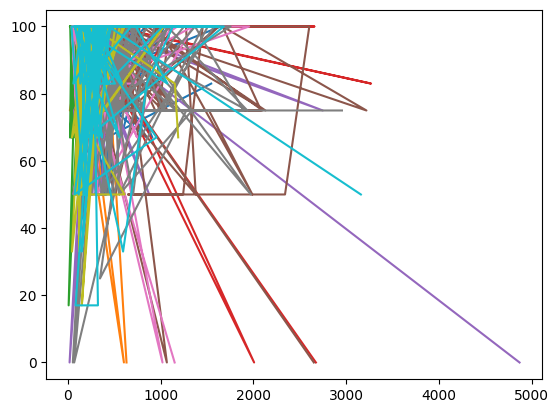

In [320]:
for i in range(10):
    tracer(liste[i],dataframe)

In [321]:
diag=top10_df.reset_index()

<BarContainer object of 10 artists>

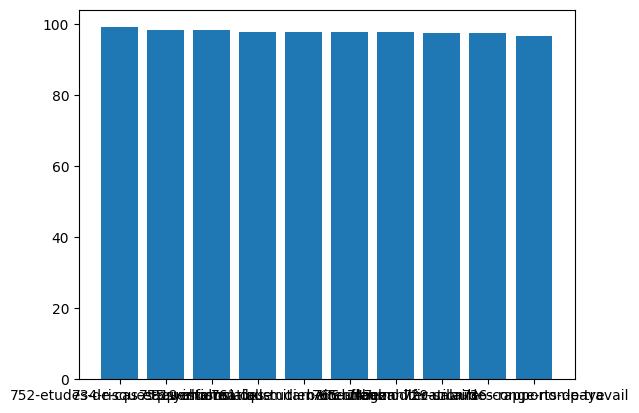

In [330]:

#plt.figure(figsize=(10,8))
plt.bar(diag.Modules,diag.Taux_reussite)
#plt.xticks

In [323]:
#plt.bar(resultatTop10['Temps'], resultatTop10['Score']); 
#plt.bar(df1['Modules'], df1['Taux_reussite']); 

In [324]:
#p=resultatTop10.plot.bar()

In [325]:
#Diagramme


#fig= ax.bar(df2, x='Modules', y='Taux_reussite')

In [326]:
def tracer(Mod, dat):
   s= dat[dat['Modules']== Mod].groupby('Etudiants').score.max()
   t= dat[dat['Modules']] == Mod.groupby('Etudiants').temps.sum()
   new = dp.concat[s,t]
   plt.plot(new.s, new.t)
   


In [327]:
s= dat[dat['Modules']== Mod].groupby('Etudiants').score.sum()


NameError: name 'dat' is not defined